<a href="https://colab.research.google.com/github/asma-h99/Movie-recommendation-system/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can get the data by installing it using this link:  https://files.grouplens.org/datasets/movielens/ml-25m.zip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ipywidgets as widgets
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
movies = pd.read_csv('/content/drive/MyDrive/ml-25m/movies.csv')

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [4]:
movies['title'] = movies['title'].apply(lambda x: re.sub('[^a-zA-Z0-9 ]',"",x))
movies['year'] = movies['title'].str.extract(r'(\d{4})')


In [5]:
movies

,movieId,title,genres,year
0,1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji 1995,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men 1995,Comedy|Romance,1995
3,4,Waiting to Exhale 1995,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II 1995,Comedy,1995
...,...,...,...,...
62418,209157,We 2018,Drama,2018
62419,209159,Window of the Soul 2001,Documentary,2001
62420,209163,Bad Poems 2018,Comedy|Drama,2018
62421,209169,A Girl Thing 2001,(no genres listed),2001


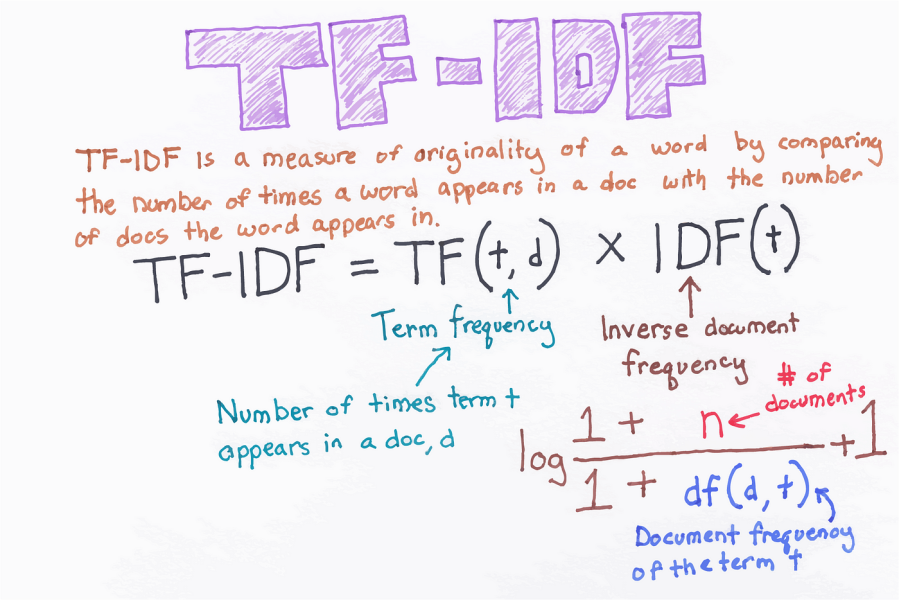

In [6]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))

In [7]:
tfidf = vectorizer.fit_transform(movies['title'])

**In this code we will find the top 5 movies that are similar to the name of movie that we will write in the box.**

In [8]:
def search (title):
  title = re.sub('[^a-zA-Z0-9 ]',"",title)
  similarity_vector = vectorizer.transform([title])
  similarity = cosine_similarity(similarity_vector , tfidf).flatten()
  indices_most_relative = np.argpartition(similarity, -5)[-5:]
  values_most_relative = movies.iloc[indices_most_relative][::-1]
  return values_most_relative

In [9]:
search('Harry potter')

,movieId,title,genres,year
13512,69844,Harry Potter and the HalfBlood Prince 2009,Adventure|Fantasy|Mystery|Romance|IMAX,2009
4790,4896,Harry Potter and the Sorcerers Stone aka Harry...,Adventure|Children|Fantasy,2001
5704,5816,Harry Potter and the Chamber of Secrets 2002,Adventure|Fantasy,2002
10408,40815,Harry Potter and the Goblet of Fire 2005,Adventure|Fantasy|Thriller|IMAX,2005
11700,54001,Harry Potter and the Order of the Phoenix 2007,Adventure|Drama|Fantasy|IMAX,2007


In [10]:
movie_input = widgets.Text(
    value="Movie name",
    description='Movie Title',
    display=False
)
movie_output_list = widgets.Output()

def when_type(data_list):
    with movie_output_list:
        movie_output_list.clear_output(wait=True)
        title = data_list['new']
        if title == "Movie name":
            movie_input.value = ""
        if len(title) > 5:
            display(search(title))

movie_input.observe(when_type, names='value')
display(movie_input, movie_output_list)


Text(value='Movie name', description='Movie Title')

Output()

when_type: is a function we call it whenever we write anything on the box.

We will find the movie that is similar to the movie that we liked

In [11]:
ratings = pd.read_csv('/content/drive/MyDrive/ml-25m/ratings.csv')

In [12]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


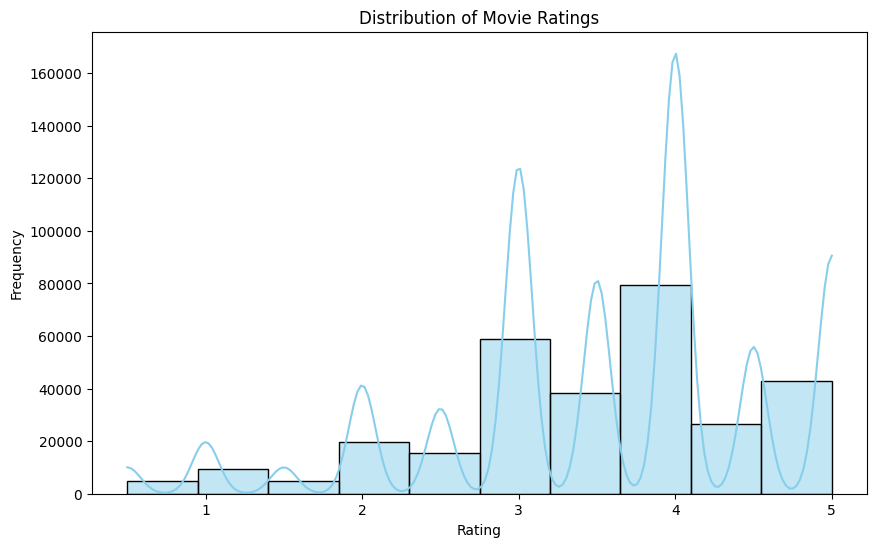

In [13]:
merged_data = pd.merge(ratings, movies, on='movieId')
sampled_data = merged_data.sample(n=300000, random_state=42)

# Plot the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(sampled_data['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [14]:
sampled_data['rating'].unique()

array([3. , 1. , 2.5, 5. , 4. , 4.5, 2. , 3.5, 0.5, 1.5])

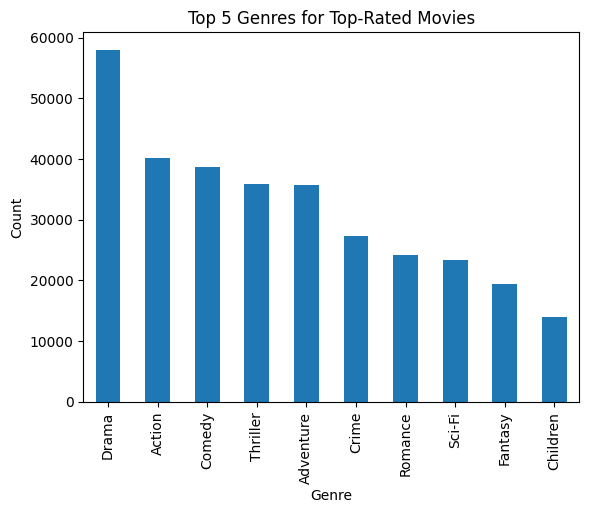

In [15]:
# Assuming your dataframe is named 'df'
# Split genres into a list of genres
sampled_data['genre_list'] = sampled_data['genres'].str.split('|')

# Create an empty dataframe to store results
top_rated_by_genre = pd.DataFrame(columns=sampled_data.columns)

# Iterate over unique genres
unique_genres = sampled_data['genre_list'].explode().unique()
for genre in unique_genres:
    # Filter rows where the genre is present
    genre_movies = sampled_data[sampled_data['genre_list'].apply(lambda x: genre in x)]

    # Filter rows where rating is 5
    top_rated_genre_movies = genre_movies[genre_movies['rating'] == 5]

    # Sort the top-rated genre movies by rating in descending order
    sorted_top_rated_genre_movies = top_rated_genre_movies.sort_values(by='rating', ascending=False)

    # Append the top-rated genre movies to the result dataframe
    top_rated_by_genre = pd.concat([top_rated_by_genre, sorted_top_rated_genre_movies])

top_genres_count = top_rated_by_genre['genre_list'].explode().value_counts().head(10)

# Plot the top 5 genres
top_genres_count.plot(kind='bar', xlabel='Genre', ylabel='Count', title='Top 5 Genres for Top-Rated Movies')
plt.show()


In [16]:
top_genres_count

Drama        57990
Action       40149
Comedy       38761
Thriller     35891
Adventure    35800
Crime        27342
Romance      24162
Sci-Fi       23382
Fantasy      19355
Children     13901
Name: genre_list, dtype: int64

In [17]:
sampled_data

,userId,movieId,rating,timestamp,title,genres,year,genre_list
15347762,36883,34072,3.0,1140486934,March of the Penguins Marche de lempereur La 2005,Documentary,2005,[Documentary]
16647840,119605,1566,3.0,1041041099,Hercules 1997,Adventure|Animation|Children|Comedy|Musical,1997,"[Adventure, Animation, Children, Comedy, Musical]"
23915192,96265,3304,1.0,953592421,Blue Collar 1978,Crime|Drama,1978,"[Crime, Drama]"
10052313,93295,344,3.0,1164951023,Ace Ventura Pet Detective 1994,Comedy,1994,[Comedy]
12214125,129938,370,2.5,1136823862,Naked Gun 33 13 The Final Insult 1994,Action|Comedy,1994,"[Action, Comedy]"
...,...,...,...,...,...,...,...,...
16314856,158119,5995,4.0,1047061828,Pianist The 2002,Drama|War,2002,"[Drama, War]"
10953041,19077,265,4.0,979256478,Like Water for Chocolate Como agua para chocol...,Drama|Fantasy|Romance,1992,"[Drama, Fantasy, Romance]"
20122007,46499,79,3.0,944178567,Juror The 1996,Drama|Thriller,1996,"[Drama, Thriller]"
7361351,159947,55820,4.5,1370230825,No Country for Old Men 2007,Crime|Drama,2007,"[Crime, Drama]"


In [18]:
def finding_similar_movies (movie_id):
  #We will find here the users who are similar to us
  similar_users = ratings[(ratings['movieId'] == movie_id) & (ratings['rating'] > 4)]['userId'].unique()
  similar_users_recs = ratings[(ratings['userId'].isin(similar_users) & (ratings['rating'] >4))]['movieId']

  # This step is to find the top 10% of the recommendation from people who are similar to us on the movie that we choose
  similar_users_recs = similar_users_recs.value_counts() / len(similar_users)
  similar_users_recs = similar_users_recs[similar_users_recs > 0.1]

  # Find how common the recommendations were among all of the users
  all_users = ratings[(ratings['movieId'].isin(similar_users_recs.index)) & (ratings['rating'] > 4)]
  all_users_recs = (all_users['movieId'].value_counts()) / len(all_users['userId'].unique())

  rec_percent = pd.concat([similar_users_recs, all_users_recs], axis = 1)
  rec_percent.columns = ['similar', 'all']
  rec_percent['score'] = rec_percent['similar'] / rec_percent['all']

  rec_percent = rec_percent.sort_values('score', ascending= False)

  return rec_percent.head(10).merge(movies, left_index=True, right_on = 'movieId')[['score', 'title' ,'genres']]

In [19]:
movie_input_name = widgets.Text(
    value="Movie name",
    description='Movie Title',
    display=False
)
recommendation_output_list = widgets.Output()

def when_type(data_list):
    with recommendation_output_list:
        recommendation_output_list.clear_output()
        title = data_list['new']
        if len(title) > 5:
            results= (search(title))
            movie_id = results.iloc[0]['movieId']
            display(finding_similar_movies(movie_id))

movie_input_name.observe(when_type, names = 'value')
display(movie_input_name, recommendation_output_list)

Text(value='Movie name', description='Movie Title')

Output()